# B) Correlation / Métriques 

Métriques des Axes (X, Y, Z):
    Nombre de pics  Amplitude moyenne
X         58803.0          15.578125
Y         62967.0          15.984375
Z         78000.0          10.703125

Corrélations entre les Axes (X, Y, Z):
           X         Y         Z
X  1.000000 -0.176865 -0.182521
Y -0.176865  1.000000 -0.113075
Z -0.182521 -0.113075  1.000000


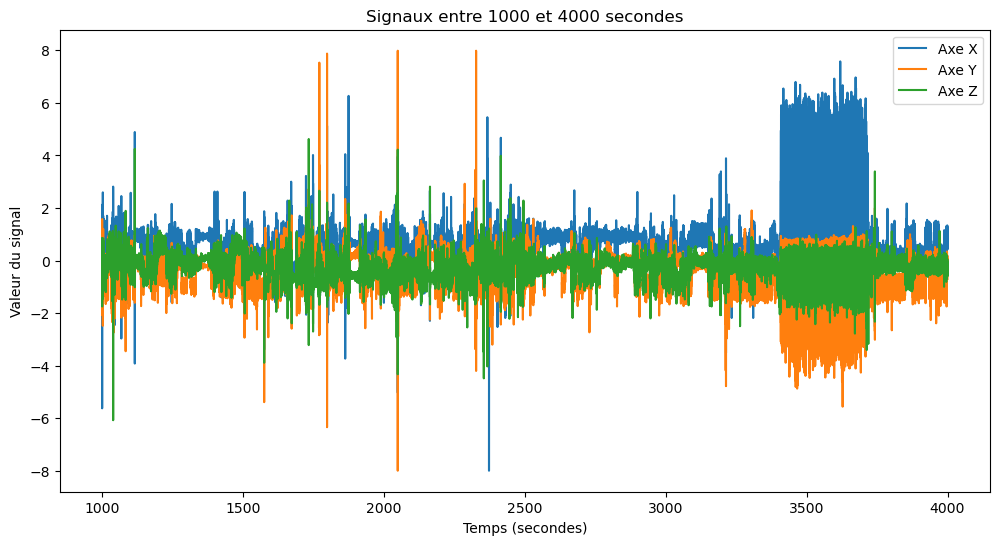

In [6]:
import pandas as pd

# Charger le fichier CSV
file_path = "/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/Github/HAH913E-2024-projet/AX3 Project/Sans titre/data/NoneSmokerCardio.csv"
data = pd.read_csv(file_path)

# Renommer les colonnes pour une meilleure lisibilité
data.columns = ['Temps', 'X', 'Y', 'Z']

# Convertir la colonne 'Temps' en datetime
data['Temps'] = pd.to_datetime(data['Temps'], errors='coerce')

# Calculer le temps relatif en secondes
data['relative_time_seconds'] = (data['Temps'] - data['Temps'].iloc[0]).dt.total_seconds()

# Sélectionner les données entre 1000 et 4000 secondes
data_filtered = data[(data['relative_time_seconds'] >= 1000) & (data['relative_time_seconds'] <= 4000)]

# Fonction pour calculer les métriques de base
def calculate_basic_metrics(signal):
    # Nombre de pics détectés manuellement : dérivée simple pour détecter des variations significatives
    peaks = (signal[1:-1] > signal[:-2]) & (signal[1:-1] > signal[2:])
    num_peaks = peaks.sum()
    
    # Intensité moyenne (amplitude)
    mean_amplitude = signal.max() - signal.min() if len(signal) > 0 else 0
    
    return num_peaks, mean_amplitude

# Calculer les métriques pour chaque axe
metrics = {}
for axis in ['X', 'Y', 'Z']:
    signal = data_filtered[axis].values  # Utiliser les données filtrées
    num_peaks, mean_amplitude = calculate_basic_metrics(signal)
    metrics[axis] = {
        'Nombre de pics': num_peaks,
        'Amplitude moyenne': mean_amplitude,
    }

# Calculer la corrélation entre les axes X, Y et Z pour les données filtrées
correlations = data_filtered[['X', 'Y', 'Z']].corr()

# Présenter les résultats des métriques et des corrélations
metrics_df = pd.DataFrame(metrics).T
print("Métriques des Axes (X, Y, Z):\n", metrics_df)
print("\nCorrélations entre les Axes (X, Y, Z):\n", correlations)

# Afficher les signaux filtrés sur un graphe
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for axis in ['X', 'Y', 'Z']:
    plt.plot(data_filtered['relative_time_seconds'], data_filtered[axis], label=f'Axe {axis}')

plt.title("Signaux entre 1000 et 4000 secondes")
plt.xlabel("Temps (secondes)")
plt.ylabel("Valeur du signal")
plt.legend()
plt.show()


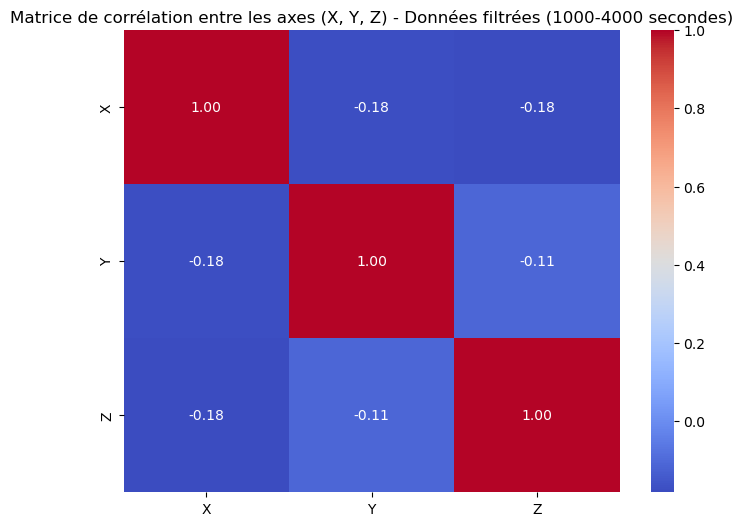

In [8]:
# Calculer la corrélation entre les axes X, Y et Z pour les données filtrées
correlations = data_filtered[['X', 'Y', 'Z']].corr()

# Importer les bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns

# Créer une figure pour afficher la matrice de corrélation
plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)

# Ajouter un titre au graphique
plt.title("Matrice de corrélation entre les axes (X, Y, Z) - Données filtrées (1000-4000 secondes)")

# Afficher le graphique
plt.show()


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = "/Users/duhameleve/Desktop/M2_SNS/M2SNS/Sante/Github/HAH913E-2024-projet/AX3 Project/Sans titre/data/NoneSmokerCardio.csv"

data = pd.read_csv(file_path)

import pandas as pd
# Renommer les colonnes en tenant compte de leur nombre
data.columns = ['Temps', 'X', 'Y', 'Z']  # Ajoutez un nom pour chaque colonne présente

# Convertir la colonne 'Temps' en datetime si ce n'est pas déjà fait
data['Temps'] = pd.to_datetime(data['Temps'])

In [4]:
# Recalculer les métriques des axes (X, Y, Z) sans dépendre de SciPy
import pandas as pd

def calculate_basic_metrics(signal):
    # Nombre de pics détectés manuellement : simple dérivée pour détection de variations significatives
    peaks = (signal[1:-1] > signal[:-2]) & (signal[1:-1] > signal[2:])
    num_peaks = peaks.sum()
    
    # Intensité moyenne (amplitude)
    mean_amplitude = signal.max() - signal.min() if len(signal) > 0 else 0
    
    return num_peaks, mean_amplitude

# Calcul des métriques pour chaque axe
metrics = {}
for axis in ['X', 'Y', 'Z']:
    signal = data[axis].values
    num_peaks, mean_amplitude = calculate_basic_metrics(signal)
    metrics[axis] = {
        'Nombre de pics': num_peaks,
        'Amplitude moyenne': mean_amplitude,
    }

# Calculer la corrélation entre les axes X, Y et Z
correlations = data[['X', 'Y', 'Z']].corr()

# Présenter les résultats des métriques et des corrélations
metrics_df = pd.DataFrame(metrics).T
print("Métriques des Axes (X, Y, Z):\n", metrics_df)
print("\nCorrélations entre les Axes (X, Y, Z):\n", correlations)


Métriques des Axes (X, Y, Z):
    Nombre de pics  Amplitude moyenne
X        150385.0          15.984375
Y        164599.0          15.984375
Z        202530.0          10.703125

Corrélations entre les Axes (X, Y, Z):
           X         Y         Z
X  1.000000 -0.257405 -0.165001
Y -0.257405  1.000000 -0.136309
Z -0.165001 -0.136309  1.000000


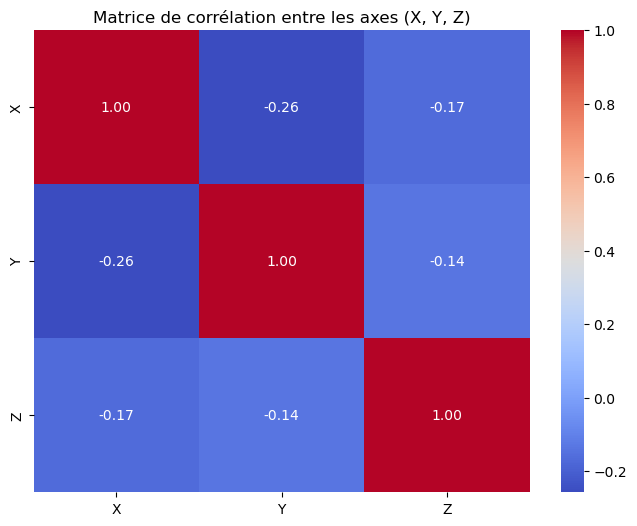

In [5]:
# Calculer la corrélation entre les axes X, Y et Z
correlations = data[['X', 'Y', 'Z']].corr()

# Afficher la matrice de corrélation
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.heatmap(correlations, annot=True, cmap="coolwarm", fmt=".2f", cbar=True)
plt.title("Matrice de corrélation entre les axes (X, Y, Z)")
plt.show()


L'axe Z présente plus de pics que l'axe X et Y, quasiment 1/4 de pics supplémentaires, ce qui indique que l'activité mesurée présente plus de variations rapides sur l'axe Z, comme une oscillation ou une activité périodique. 
Cependant l'amplitude moyenne est plus faible sur l'axe Z. Les variations sur l'axe Z sont donc plus fréquentes mais de moins grosse intensité. 

En course, ces pics représentent les oscillations du corps dans différentes directions :

  - X :  Mouvement latéral (oscillations gauche-droite des bras ou des hanches).
  - Y : Mouvement vers l'avant ou l'arrière (propulsion ou oscillations en raison du pas de course).
- Z : Reflète les variations verticales (montées et descentes dues aux foulées).
Le fait que Z ait le plus grand nombre de pics montre que le mouvement vertical (les rebonds des foulées) est le plus rapide et le plus fréquent.


Les amplitudes similaires pour X et Y suggèrent que les mouvements latéraux (bras) et avant-arrière (propulsion) sont d'une intensité comparable.
L'amplitude plus faible sur Z est logique, car les oscillations verticales lors de la course sont généralement contrôlées (les rebonds sont amortis pour économiser de l'énergie et rester efficace).

L'axe Z montre une très faible corrélation négative avec X et Y, relevant des variations sur Z indépente de la variation de X et Y, d'ou le nombre de pics élévés sur Z. 
La corrélation entre X et Y reste modérément négative (-0.257), suggérant une légère opposition dans les variations entre ces deux axes.

#### *Corrélation faible entre Z et les autres axes :*
Cela montre que les variations verticales (Z) sont relativement indépendantes des mouvements latéraux (X) et avant-arrière (Y). Pendant la course, cela est attendu, car les rebonds (Z) suivent un rythme constant lié aux foulées, tandis que les bras et la propulsion peuvent varier.


La course implique un mouvement rythmique vertical dominant, comme le montrent le nombre élevé de pics et la cadence de l'axe Z. Cela reflète les cycles réguliers des foulées.